This page inverts each of the aligned face images. Do this on unmasked and masked.

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt

import os
from glob import glob

import numpy as np
import pandas as pd

import skimage.io as io
io.use_plugin('matplotlib')

import menpo
import menpo.io as mio
from menpowidgets import visualize_images
from pathlib import Path

from tqdm import tqdm

In [16]:
unfam_df = pd.read_csv("/data1/famface01/analysis/encoding/12_Features/unfam_final_frame_df.csv")
unfam_df = unfam_df.ix[:,1:]
unfam_df.head()

,vnum,vid,frame,category,fpath
0,14,Ahmed_Chalabi_U000_vid06_clip05_2secs,3,unfam,/data1/famface01/data/stimuli/vids/eight_frame...
1,14,Ahmed_Chalabi_U000_vid06_clip05_2secs,9,unfam,/data1/famface01/data/stimuli/vids/eight_frame...
2,14,Ahmed_Chalabi_U000_vid06_clip05_2secs,15,unfam,/data1/famface01/data/stimuli/vids/eight_frame...
3,14,Ahmed_Chalabi_U000_vid06_clip05_2secs,21,unfam,/data1/famface01/data/stimuli/vids/eight_frame...
4,14,Ahmed_Chalabi_U000_vid06_clip05_2secs,27,unfam,/data1/famface01/data/stimuli/vids/eight_frame...


In [5]:
fnames = [ os.path.basename(fpath.replace(".jpg", ".png")) for fpath in unfam_df.fpath ]

In [19]:
from menpo.landmark import face_ibug_68_to_face_ibug_68_trimesh, face_ibug_68_to_face_ibug_68, labeller
base = "/home/zshehzad/Downloads/tmp_sf_nn/single_frames" # these will be aligned

unmasked_images = []
for fname in tqdm(fnames):
    img = mio.import_image(os.path.join(base, fname))
    #img = img.crop_to_landmarks_proportion(0.1)
    #labeller(img, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
    unfam_images.append(img)

100%|██████████| 6912/6912 [00:44<00:00, 155.69it/s]


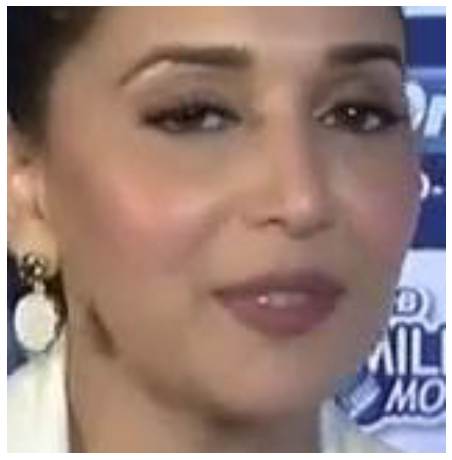

In [23]:
unfam_images[30].view()

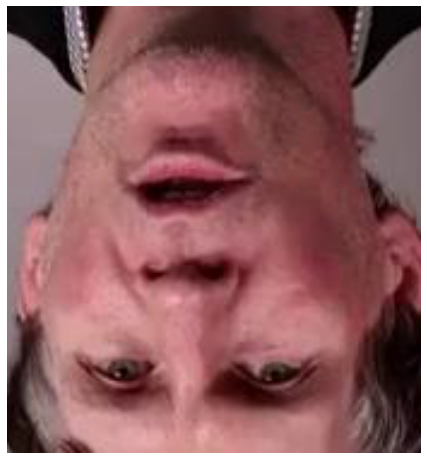

In [26]:
# This is how we do the flip
img = unfam_images[0]
menpo.image.Image(img.pixels[:,::-1,::]).view()

In [27]:
flipped_images = [ menpo.image.Image(img.pixels[:,::-1,::]) for img in tqdm(unfam_images) ]

100%|██████████| 10928/10928 [00:01<00:00, 6957.67it/s]


In [28]:
# Save

from menpo.io.output import export_image, export_landmark_file

odir = "/home/zshehzad/Downloads/tmp_sf_nn_flipped/single_frames"
os.makedirs(odir)

for i,fname in tqdm(enumerate(fnames), total=len(fnames)):
    img   = flipped_images[i]
    opath = os.path.join(odir, fname)
    export_image(img, opath, overwrite=True)

100%|██████████| 6912/6912 [00:51<00:00, 133.50it/s]


In [ ]:
./batch-represent/main.lua -data /home/zshehzad/Downloads/tmp_sf_nn_flipped/ -outDir /data1/famface01/analysis/misc/openface/unfam_flipped